# Multivariate Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

Try again following this example: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

First, define the model that will be used

In [2]:
def model(inputs, amplitude, mean_x, mean_y, sigma_x, sigma_y, offset):
    """
    2D Normal with offset
    Returns 1d array
    """
    (x, y) = inputs
    z = offset + amplitude * np.exp(
        -(((mean_x - x) / sigma_x) ** 2 + ((mean_y - y) / sigma_y) ** 2) / 2
    )
    return z.ravel()

Genreate pseudodata from the model and add some noise to it

In [3]:
means = [1, 5]
std_devs = np.array([2, 3])
covariance = np.diag(std_devs ** 2)
n_samples = 500

x_obs, y_obs = np.random.multivariate_normal(means, covariance, n_samples).T

observations = model(
    (x_obs, y_obs),
    amplitude=10,
    mean_x=means[0],
    mean_y=means[1],
    sigma_x=std_devs[0],
    sigma_y=std_devs[1],
    offset=10,
)
noise = 0.2 * np.random.normal(size=observations.shape)
data = observations + noise

**Revise this:**

~~Note to self: The following are just _points_ that are distributed in the $x$-$y$ plane. But if one is interested in fitting a 2D gaussian, which is a function of two variables that returns a scalar: $z \sim f(x,y|\theta)$. What is plotted below are the **inputs** but what we would like to see is a projection of the inputs and the **output** which is a 3D visualization~~

Now visualize both the observable space and the pseudodata

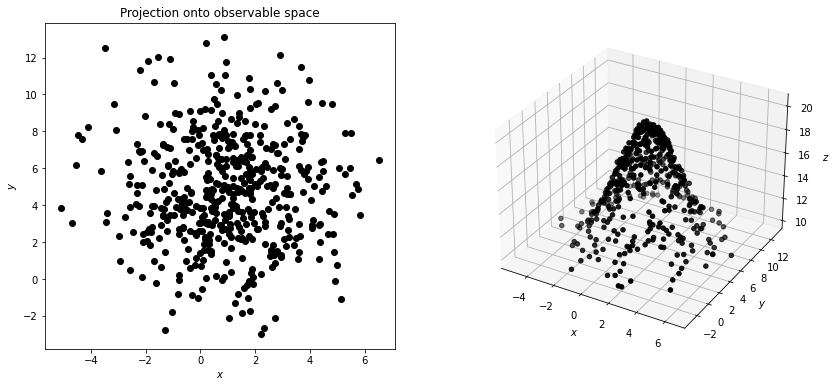

In [4]:
fig = plt.figure()
fig.set_size_inches(fig.get_figwidth() * 2.3, fig.get_figheight() * 1.5, forward=True)

ax0 = fig.add_subplot(1, 2, 1)
ax0.scatter(x_obs, y_obs, color="black")
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")
ax0.set_title("Projection onto observable space")

ax1 = fig.add_subplot(1, 2, 2, projection="3d")
ax1.scatter3D(x_obs, y_obs, data, color="black")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.set_zlabel(r"$z$");

Define the space in the observables variables ($x$, $y$) that the visualization will use (the grid mesh)

In [5]:
x_range = [means[0] - 4 * std_devs[0], means[0] + 4 * std_devs[0]]
y_range = [means[1] - 4 * std_devs[1], means[1] + 4 * std_devs[1]]
x, y = np.meshgrid(
    np.linspace(*x_range, n_samples + 1), np.linspace(*y_range, n_samples + 1)
)

Fit the model to the pseudodata and get the model predictions for the space

In [6]:
params_opt, params_cov = optimize.curve_fit(
    model, (x_obs, y_obs), data, bounds=(0, np.inf)
)
model_predictions = model((x, y), *params_opt)

In [7]:
print("True paramters:")
# amplitude=10, mean_x=means[0], mean_y=means[1], sigma_x=std_devs[0], sigma_y=std_devs[1], offset=10
for param in (10, means[0], means[1], std_devs[0], std_devs[1], 10):
    print(f"  {param}")

print("\nBest fit parameters")
for param in params_opt:
    print(f"  {param}")

True paramters:
  10
  1
  5
  2
  3
  10

Best fit parameters
  10.004860657559437
  0.998721894869035
  5.007544621208751
  1.998336669059711
  2.990606096436961
  10.01384077818879


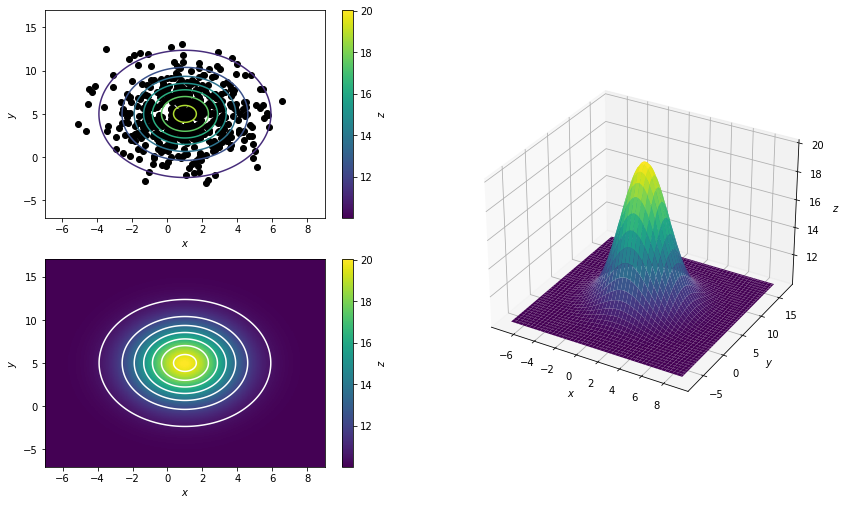

In [8]:
# c.f. https://matplotlib.org/3.1.1/gallery/mplot3d/mixed_subplots.html
# fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure()
fig.set_size_inches(fig.get_figwidth() * 2.3, fig.get_figheight() * 2.1, forward=True)

ax0 = fig.add_subplot(2, 2, 1)
ax0.scatter(x_obs, y_obs, color="black")
ax0.contour(x, y, model_predictions.reshape(x.shape))
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")

ax1 = fig.add_subplot(2, 2, 3)
# # origin determines how to the data is filled in the bounding box, so here must be "lower"
# im = ax1.imshow(
#     model((x, y), *params_opt).reshape(x.shape),
#     origin="lower",
#     extent=(x.min(), x.max(), y.min(), y.max()),
#     aspect="auto",
# )
# pcolormesh is significantly eaiser than imshow
im = ax1.pcolormesh(x, y, model((x, y), *params_opt).reshape(x.shape), shading="auto")
ax1.contour(x, y, model_predictions.reshape(x.shape), colors="white")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
fig.colorbar(im, label=r"$z$", ax=ax0)
fig.colorbar(im, label=r"$z$", ax=ax1)

# one row, but two columns and place in second column
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
im = ax2.plot_surface(x, y, model_predictions.reshape(x.shape), cmap=im.cmap)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_zlabel(r"$z$")
# fig.colorbar(im, ax=ax2, orientation="horizontal")

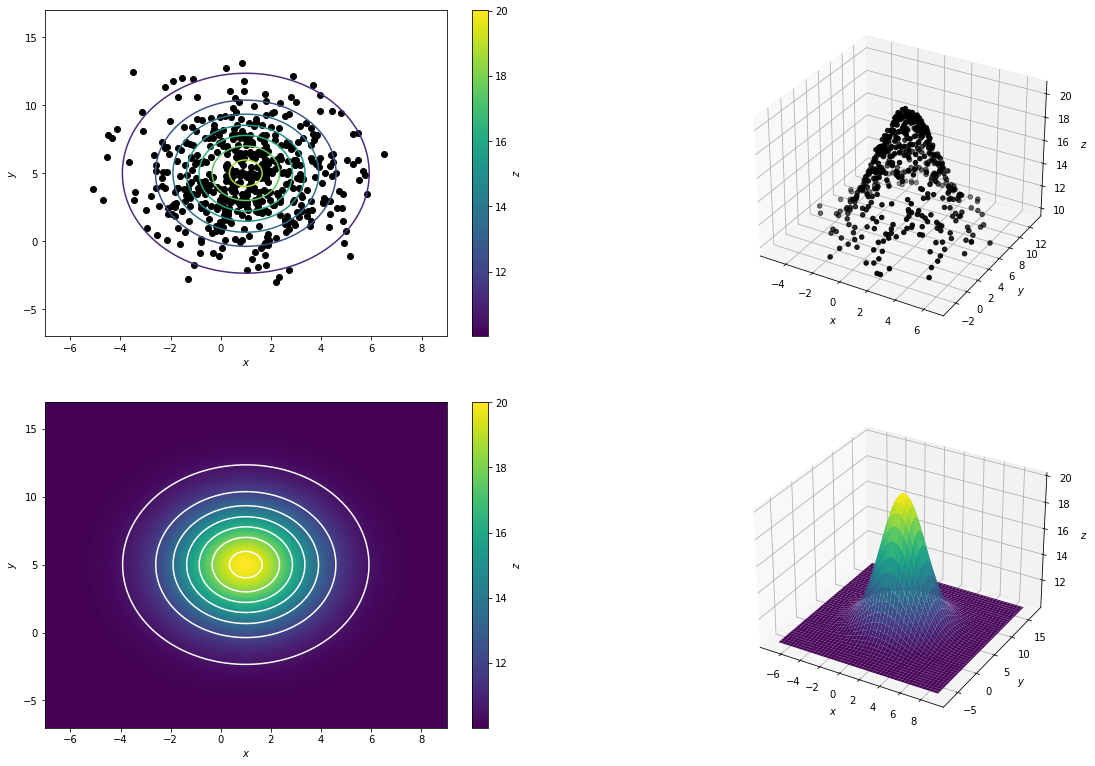

In [9]:
fig = plt.figure()
# fig.set_size_inches(fig.get_figwidth() * 2.3, fig.get_figheight() * 2.1, forward=True)
fig.set_size_inches(fig.get_figwidth() * 3.3, fig.get_figheight() * 3.3, forward=True)

ax0 = fig.add_subplot(2, 2, 1)
ax0.scatter(x_obs, y_obs, color="black")
ax0.contour(x, y, model_predictions.reshape(x.shape))
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")

ax1 = fig.add_subplot(2, 2, 3)
im = ax1.pcolormesh(x, y, model((x, y), *params_opt).reshape(x.shape), shading="auto")
ax1.contour(x, y, model_predictions.reshape(x.shape), colors="white")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
fig.colorbar(im, label=r"$z$", ax=ax0)
fig.colorbar(im, label=r"$z$", ax=ax1)

ax2 = fig.add_subplot(2, 2, 2, projection="3d")
ax2.scatter3D(x_obs, y_obs, data, color="black")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_zlabel(r"$z$")

ax3 = fig.add_subplot(2, 2, 4, projection="3d")
im = ax3.plot_surface(x, y, model_predictions.reshape(x.shape), cmap=im.cmap)
ax3.set_xlabel(r"$x$")
ax3.set_ylabel(r"$y$")
ax3.set_zlabel(r"$z$")
# fig.colorbar(im, ax=ax2, orientation="horizontal");

fig.savefig("2d_normal_model.png")